<a href="https://colab.research.google.com/github/Mayuri-thatikonda/Netflix-revenue/blob/main/Netflix_revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('DataNetflixRevenue2020.csv')

In [3]:
dataset.head()

,Area,Years,Revenue
0,United States and Canada,Q1 - 2018,1976157000
1,"Europe, Middle East and Africa",Q1 - 2018,886649000
2,Latin America,Q1 - 2018,540182000
3,Asia-Pacific,Q1 - 2018,199117000
4,United States and Canada,Q2 - 2018,2049546000


In [4]:
dataset.dtypes

Area       object
Years      object
Revenue     int64
dtype: object

In [5]:
dataset.dtypes

Area       object
Years      object
Revenue     int64
dtype: object

In [6]:
dataset['Quarter'] = dataset['Years'].apply(lambda x:x[1])

In [7]:
dataset['Quarter'][1]

'1'

In [8]:
dataset['year']=dataset['Years'].apply(lambda x:x[4:9])

In [9]:
dataset.head()

,Area,Years,Revenue,Quarter,year
0,United States and Canada,Q1 - 2018,1976157000,1,2018
1,"Europe, Middle East and Africa",Q1 - 2018,886649000,1,2018
2,Latin America,Q1 - 2018,540182000,1,2018
3,Asia-Pacific,Q1 - 2018,199117000,1,2018
4,United States and Canada,Q2 - 2018,2049546000,2,2018


In [10]:
dataset.drop(['Years'],axis=1,inplace=True)


In [11]:
dataset.head()

,Area,Revenue,Quarter,year
0,United States and Canada,1976157000,1,2018
1,"Europe, Middle East and Africa",886649000,1,2018
2,Latin America,540182000,1,2018
3,Asia-Pacific,199117000,1,2018
4,United States and Canada,2049546000,2,2018


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Area'] = le.fit_transform(dataset['Area'])
print(dataset)

    Area     Revenue Quarter   year
0      3  1976157000       1   2018
1      1   886649000       1   2018
2      2   540182000       1   2018
3      0   199117000       1   2018
4      3  2049546000       2   2018
5      1   975497000       2   2018
6      2   568071000       2   2018
7      0   221252000       2   2018
8      3  2094850000       3   2018
9      1  1004749000       3   2018
10     2   562307000       3   2018
11     0   248691000       3   2018
12     3  2160979000       4   2018
13     1  1096812000       4   2018
14     2   567137000       4   2018
15     0   276756000       4   2018
16     3  2256851000       1   2019
17     1  1233379000       1   2019
18     2   630472000       1   2019
19     0   319602000       1   2019
20     3  2501199000       2   2019
21     1  1319087000       2   2019
22     2   677136000       2   2019
23     0   349494000       2   2019
24     3  2621250000       3   2019
25     1  1428040000       3   2019
26     2   741434000       3

In [13]:
dataset['year'] = pd.to_datetime(dataset['year'], errors='coerce')

In [14]:
dataset.dtypes

Area                int64
Revenue             int64
Quarter            object
year       datetime64[ns]
dtype: object

In [15]:
dataset.head()

,Area,Revenue,Quarter,year
0,3,1976157000,1,2018-01-01
1,1,886649000,1,2018-01-01
2,2,540182000,1,2018-01-01
3,0,199117000,1,2018-01-01
4,3,2049546000,2,2018-01-01


In [16]:
dataset['year'] = dataset['year'].dt.year



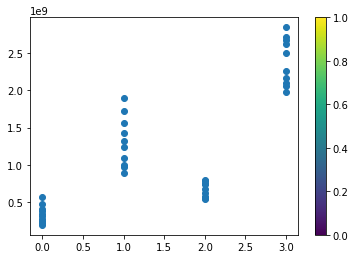

In [17]:
plt.scatter(dataset['Area'], dataset['Revenue'],cmap='viridis')

plt.colorbar()

plt.show()

In [18]:
X = dataset.loc[:, ['Area', 'Quarter', 'year']]
X.head()
       

,Area,Quarter,year
0,3,1,2018
1,1,1,2018
2,2,1,2018
3,0,1,2018
4,3,2,2018


In [19]:
y = dataset.loc[:,['Revenue']]
y.head()

,Revenue
0,1976157000
1,886649000
2,540182000
3,199117000
4,2049546000


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[7.53e+08 2.45e+09 1.43e+09 2.04e+09 6.09e+08 2.55e+08 2.50e+09 2.51e+08]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9943737027557299